In [24]:
from fktools import *
import tensorflow as tf
import sklearn


In [33]:
# X = np.load("dataset_X.npz")['arr_0']
# y = np.load("dataset_y.npz")['arr_0']

# print(f"X shape: {X.shape}")
# print(f"y shape: {y.shape}")


X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [ ]:
layers = [
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
]

test_model = tf.keras.Sequential(layers)

test_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='kld',
    metrics=['acc']
)
# test_model.summary()


history = test_model.fit(
    X, y,
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,256 (20.53 KB)

 Trainable params: 5,256 (20.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
657/734 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - acc: 0.1778 - loss: 1.0010

2026-01-07 16:05:14.728642: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-07 16:05:14.728670: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-07 16:05:14.728682: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-07 16:05:15.696694: I external/l

734/734 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.1914 - loss: 0.9978 - val_acc: 0.2183 - val_loss: 0.9886
Epoch 2/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - acc: 0.2146 - loss: 0.9815 - val_acc: 0.2386 - val_loss: 0.9704
Epoch 3/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - acc: 0.2416 - loss: 0.9621 - val_acc: 0.2762 - val_loss: 0.9491
Epoch 4/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - acc: 0.2878 - loss: 0.9380 - val_acc: 0.3120 - val_loss: 0.9215
Epoch 5/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - acc: 0.3224 - loss: 0.9068 - val_acc: 0.3413 - val_loss: 0.8857
Epoch 6/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - acc: 0.3424 - loss: 0.8688 - val_acc: 0.3411 - val_loss: 0.8453
Epoch 7/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - acc: 0.3403 - loss: 0.8245 - val_acc: 0.3438 - val_loss: 0.7969
Epoch 8/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - acc: 0.3493 - loss: 0.7754 - val_acc: 0.3549 - val_loss: 0.7474
Epoch 9/100
734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 82

In [ ]:
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

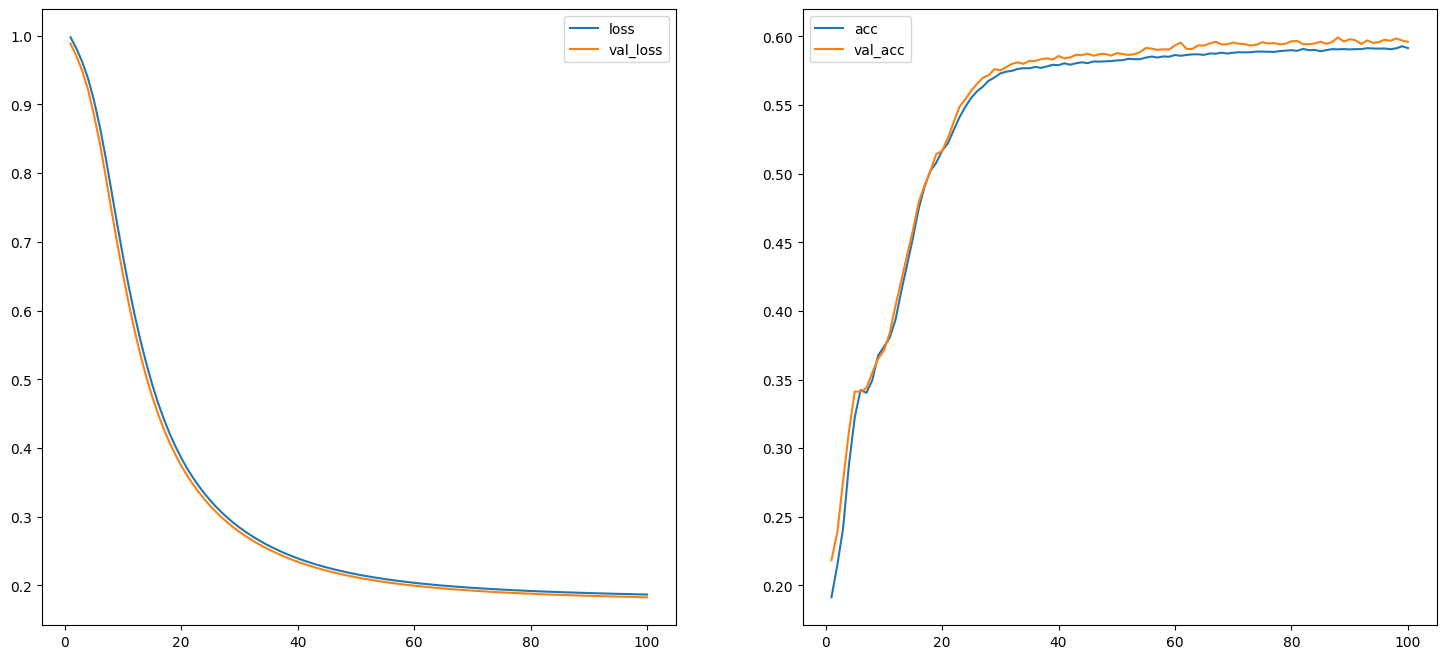

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="val_loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="acc")
ax[1].plot(epochs, val_acc, label="val_acc")
ax[1].legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Text(0.5, 1.0, 'should be')

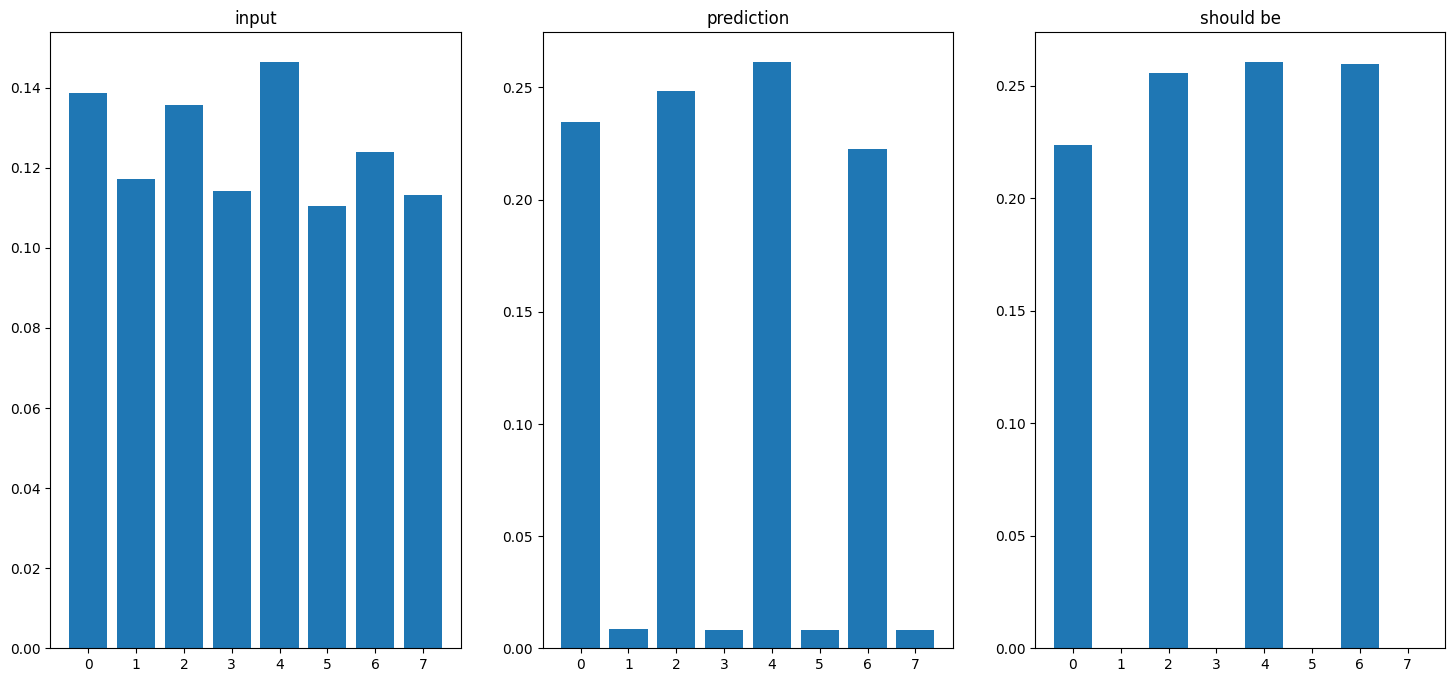

In [31]:
i = 14

pred = test_model.predict(np.array([X[i]]))[0]

xs = np.arange(len(X[i]))

fig, ax = plt.subplots(ncols=3, figsize=(18,8))
ax[0].bar(xs, X[i])
ax[0].set_title("input")
ax[1].bar(xs, pred)
ax[1].set_title("prediction")
ax[2].bar(xs, y[i])
ax[2].set_title("should be")

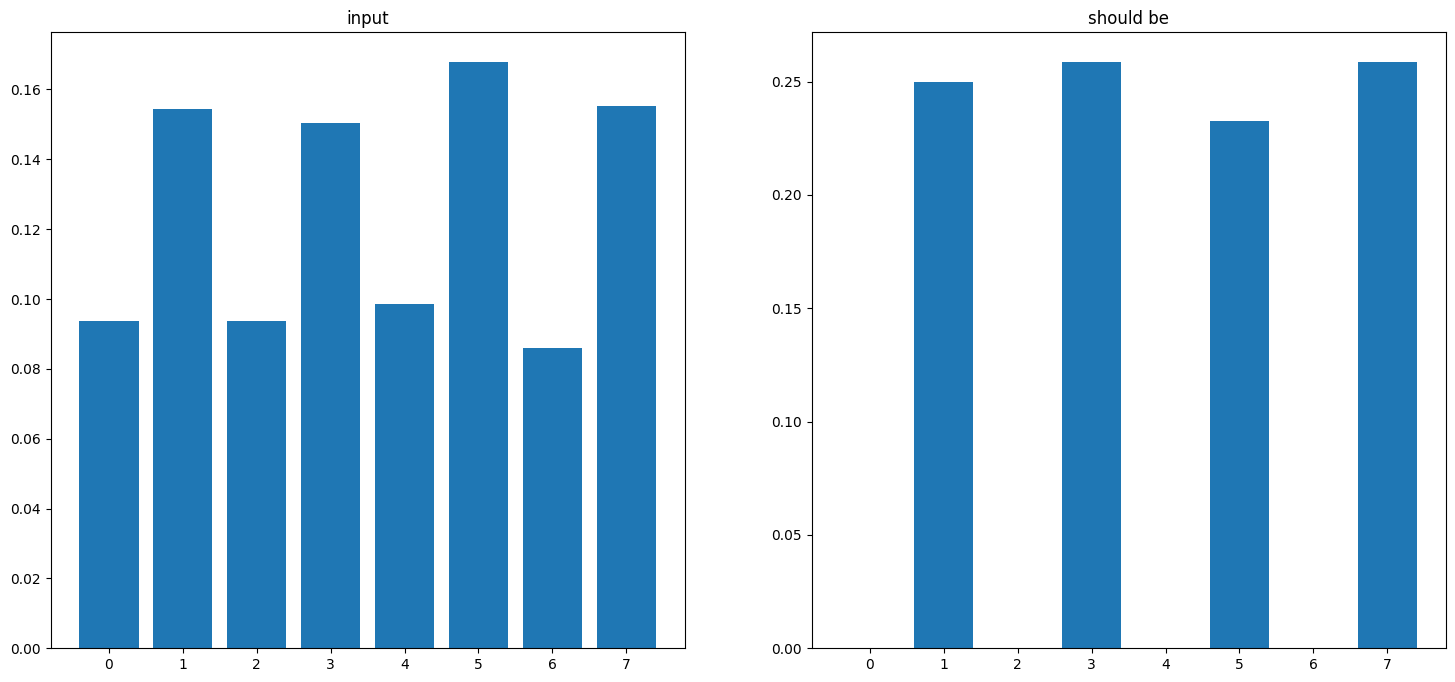

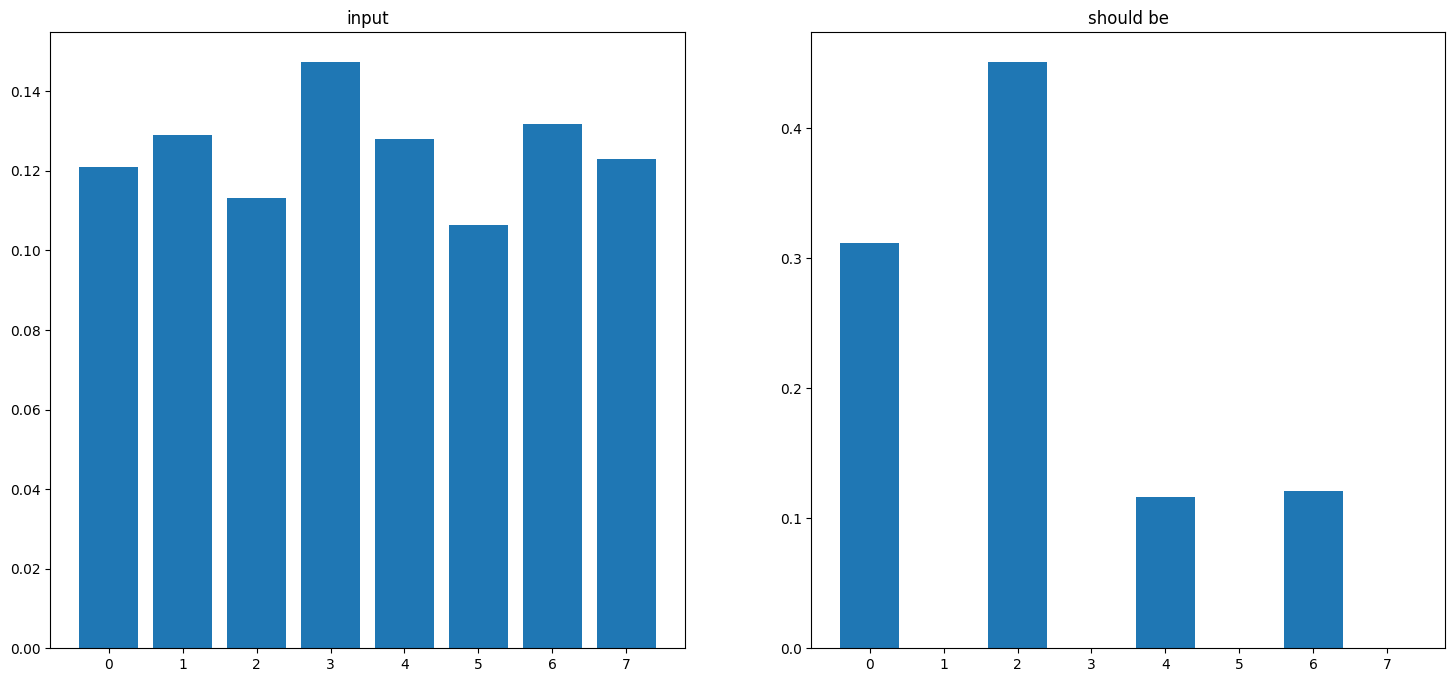

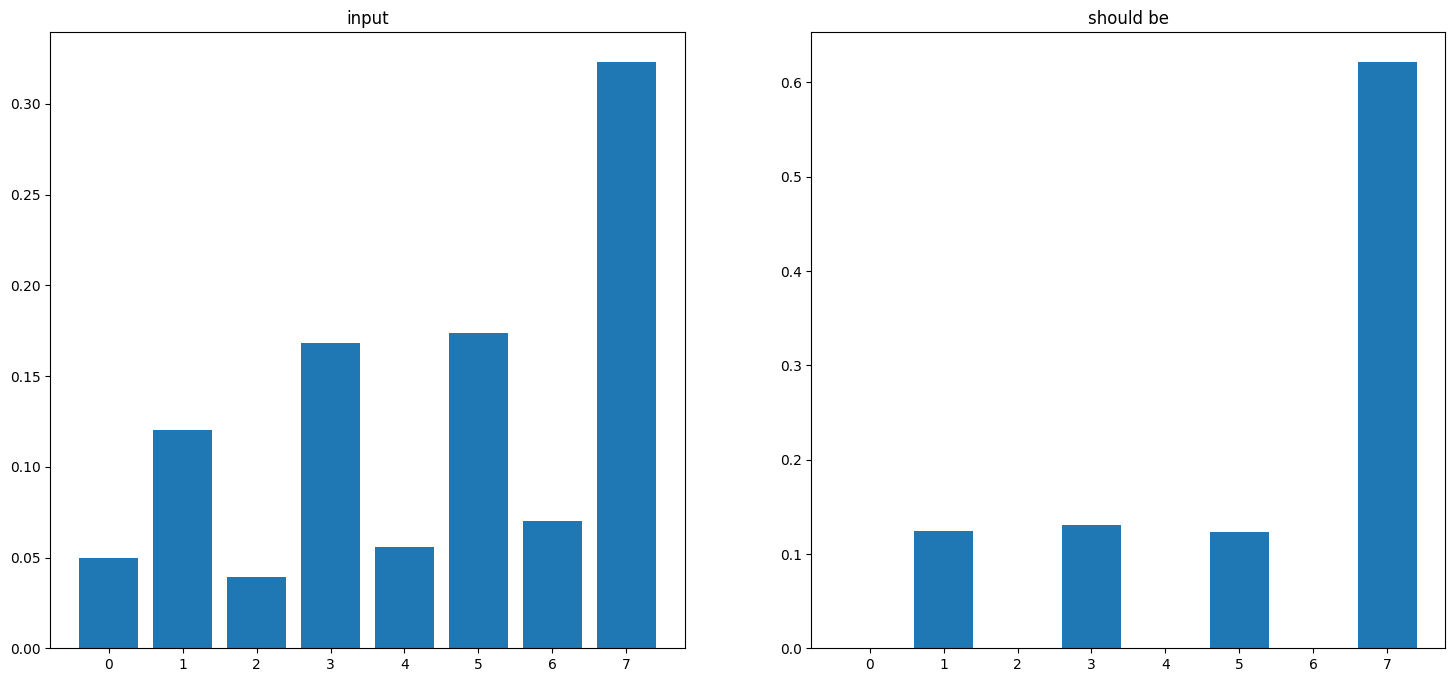

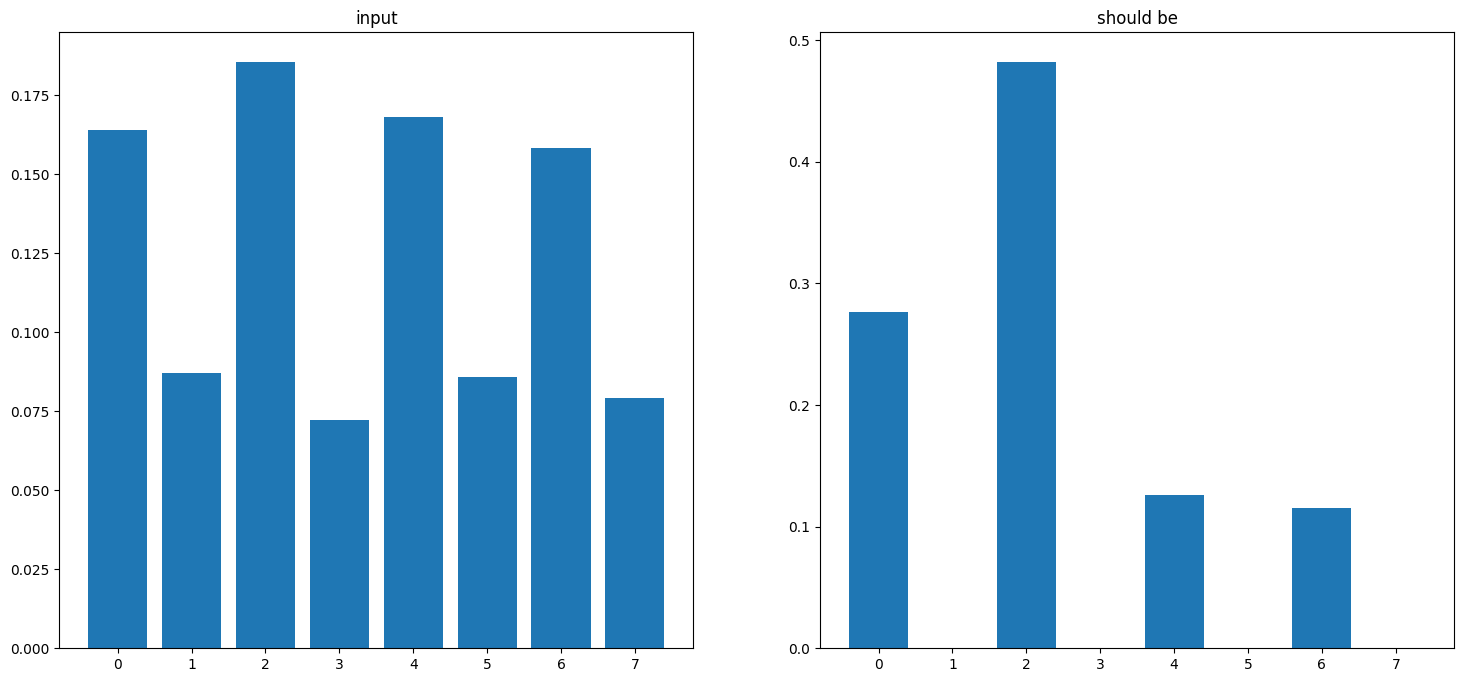

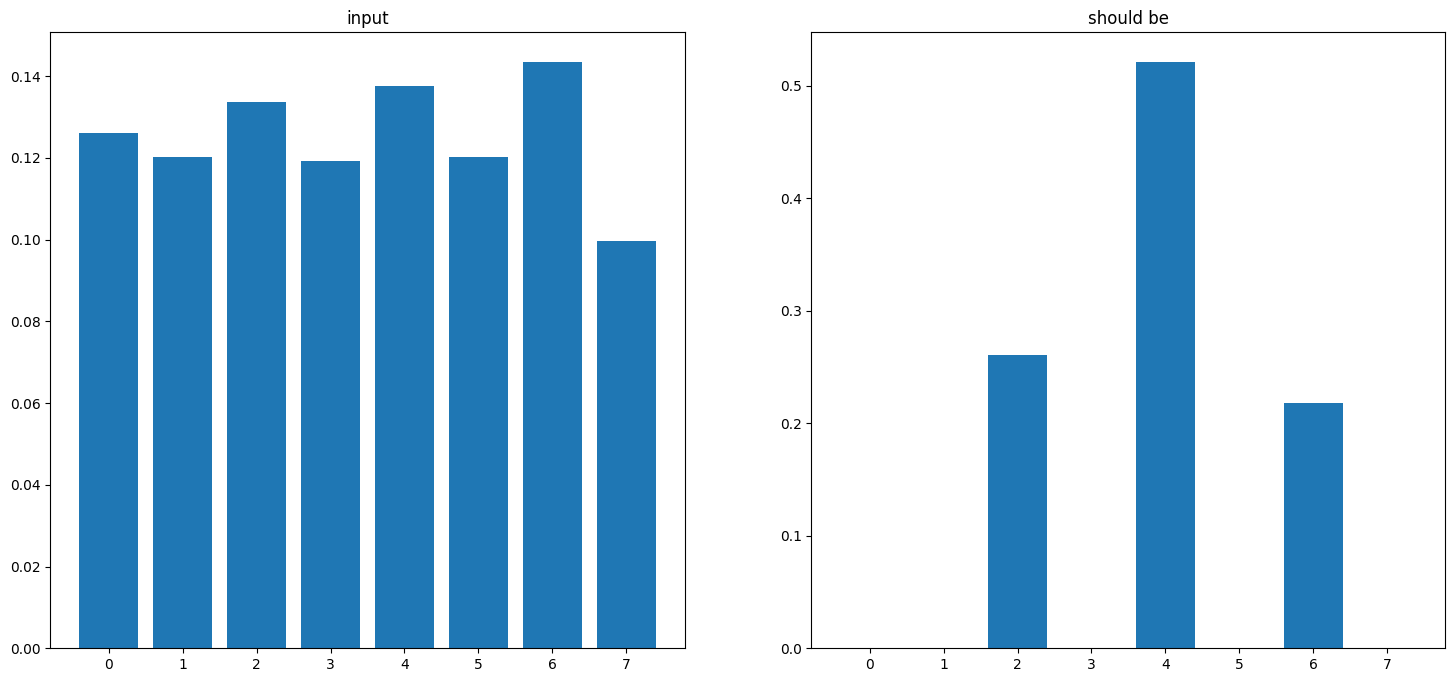

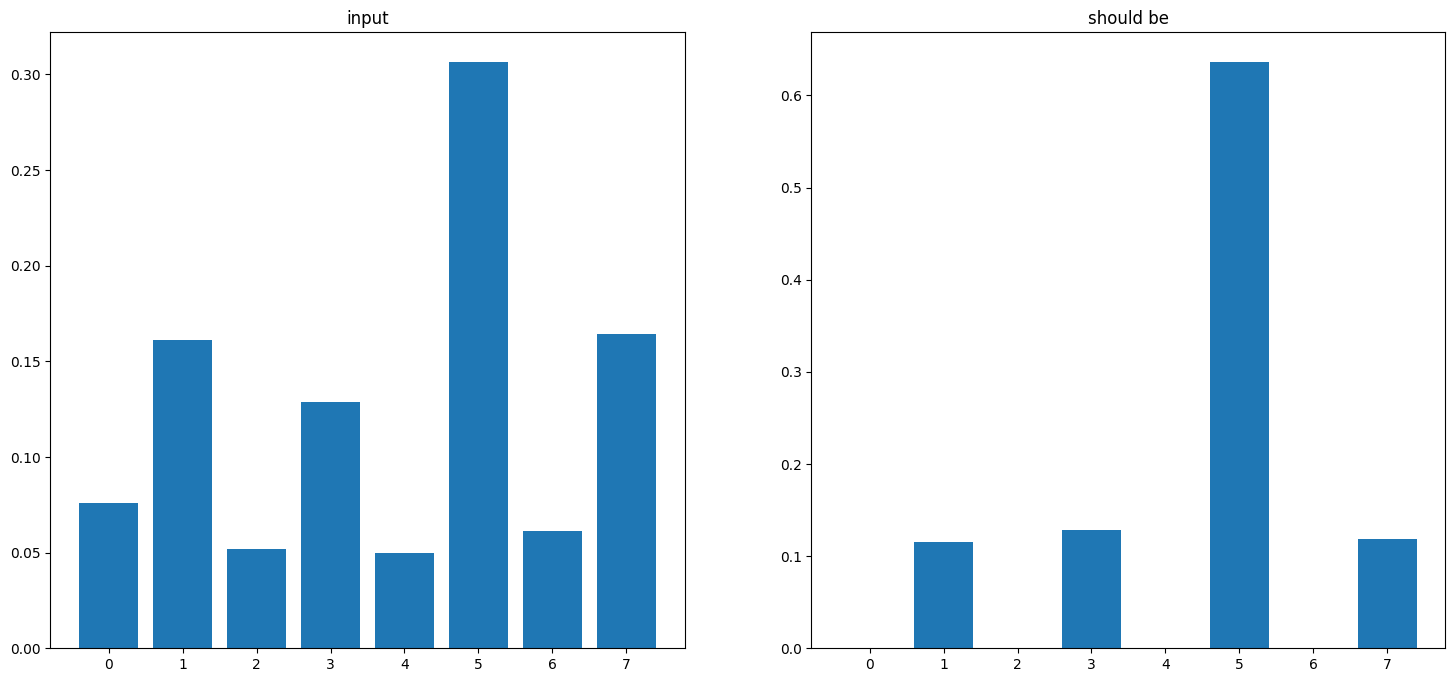

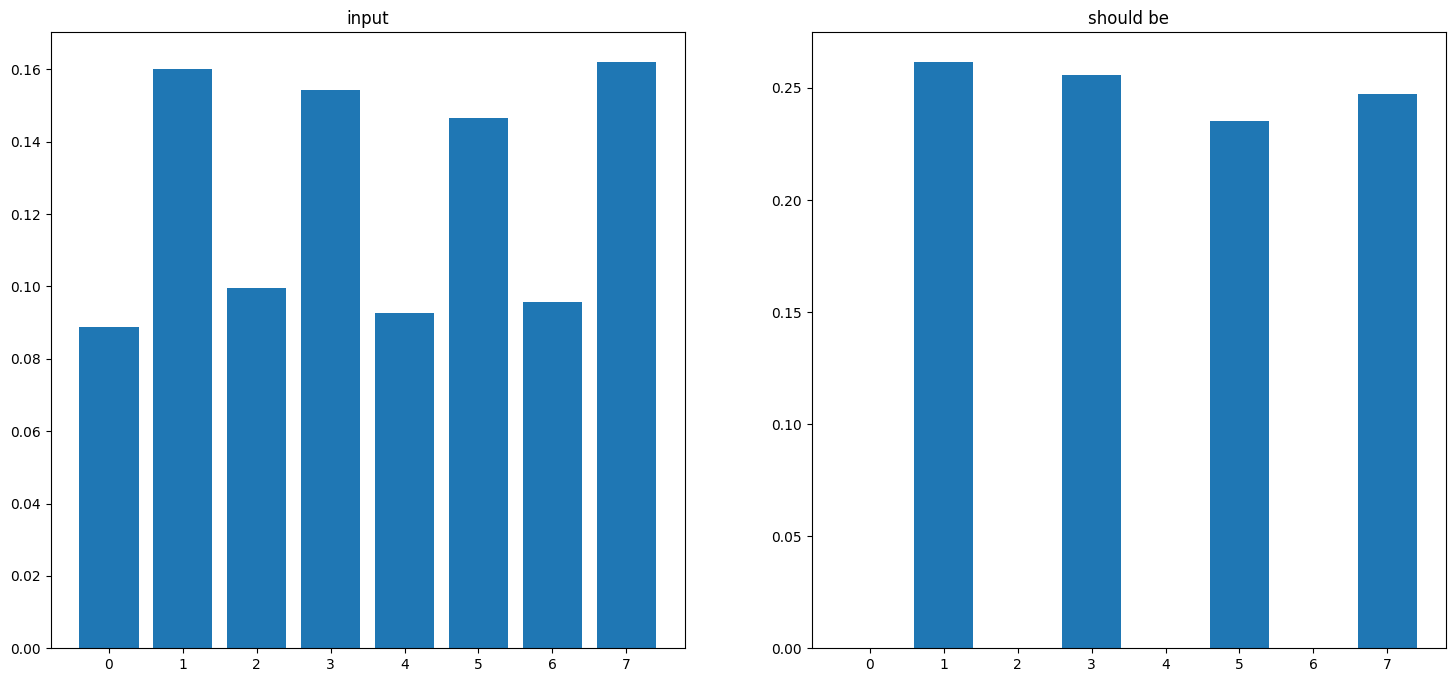

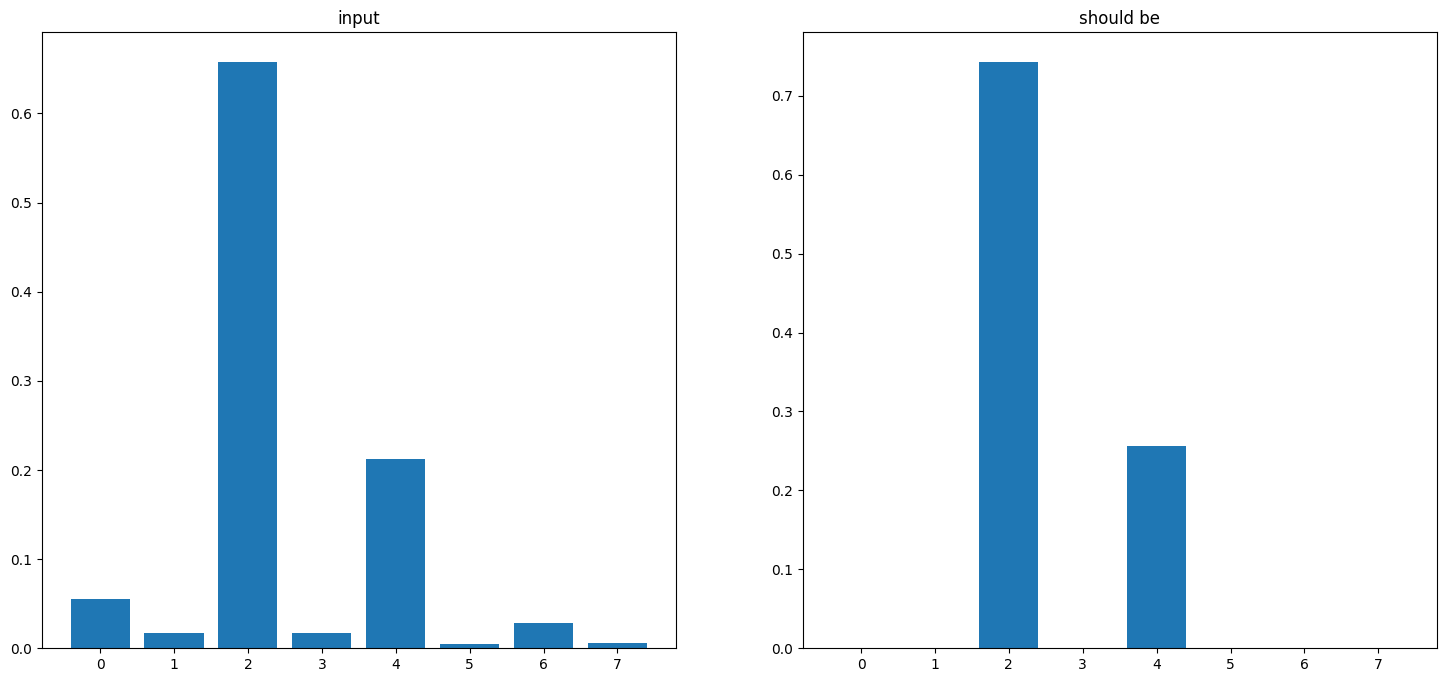

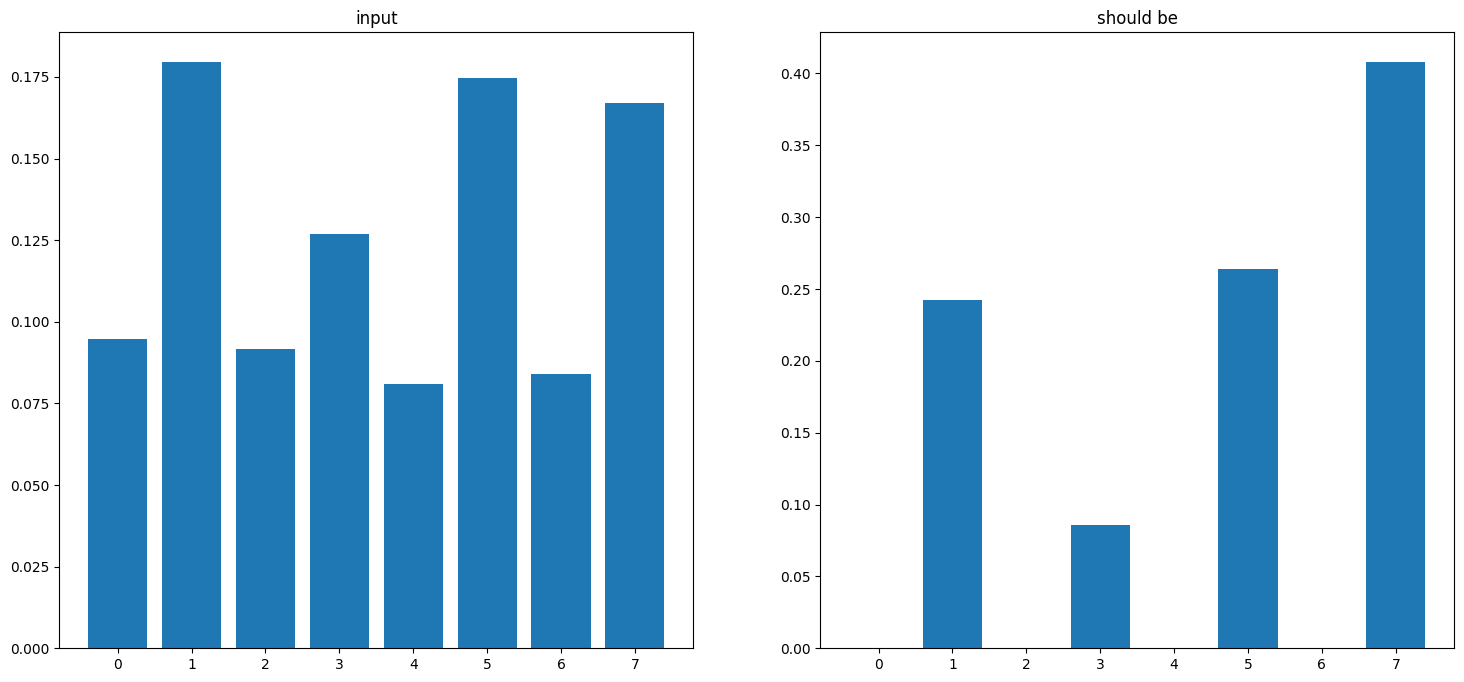

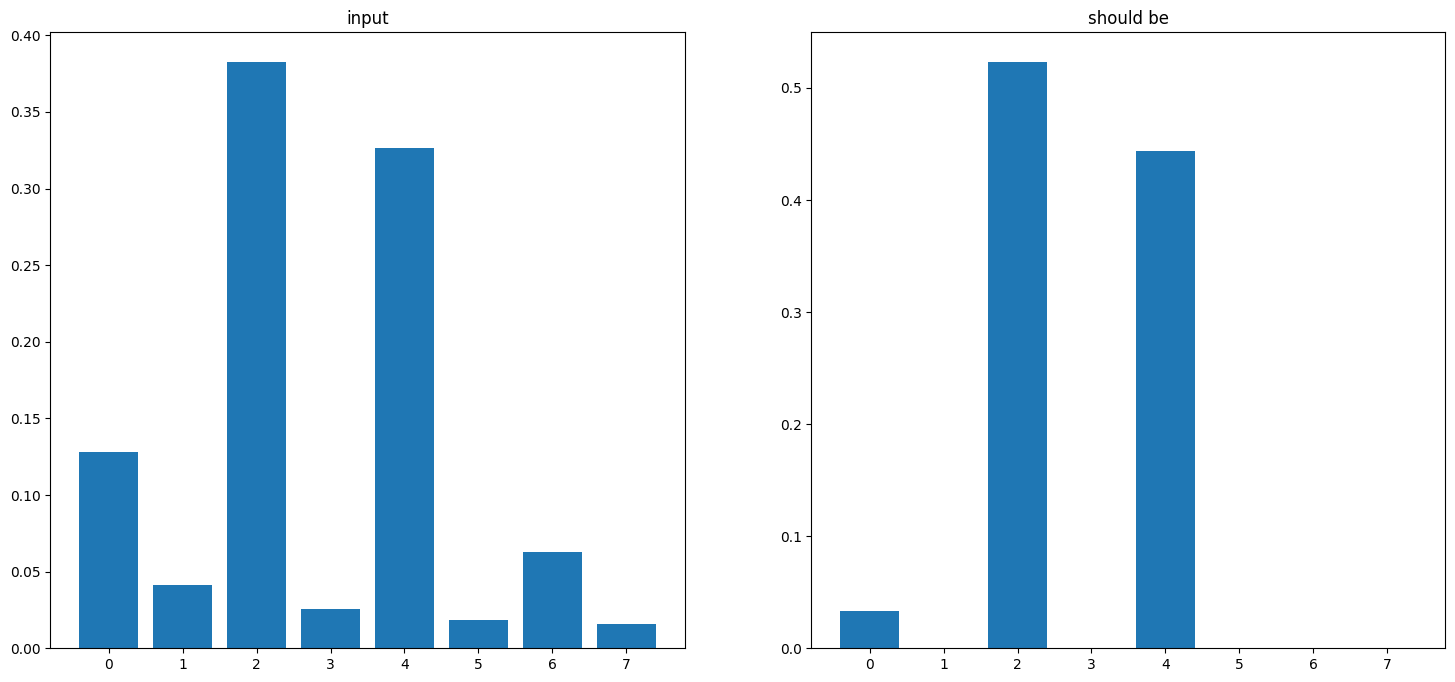

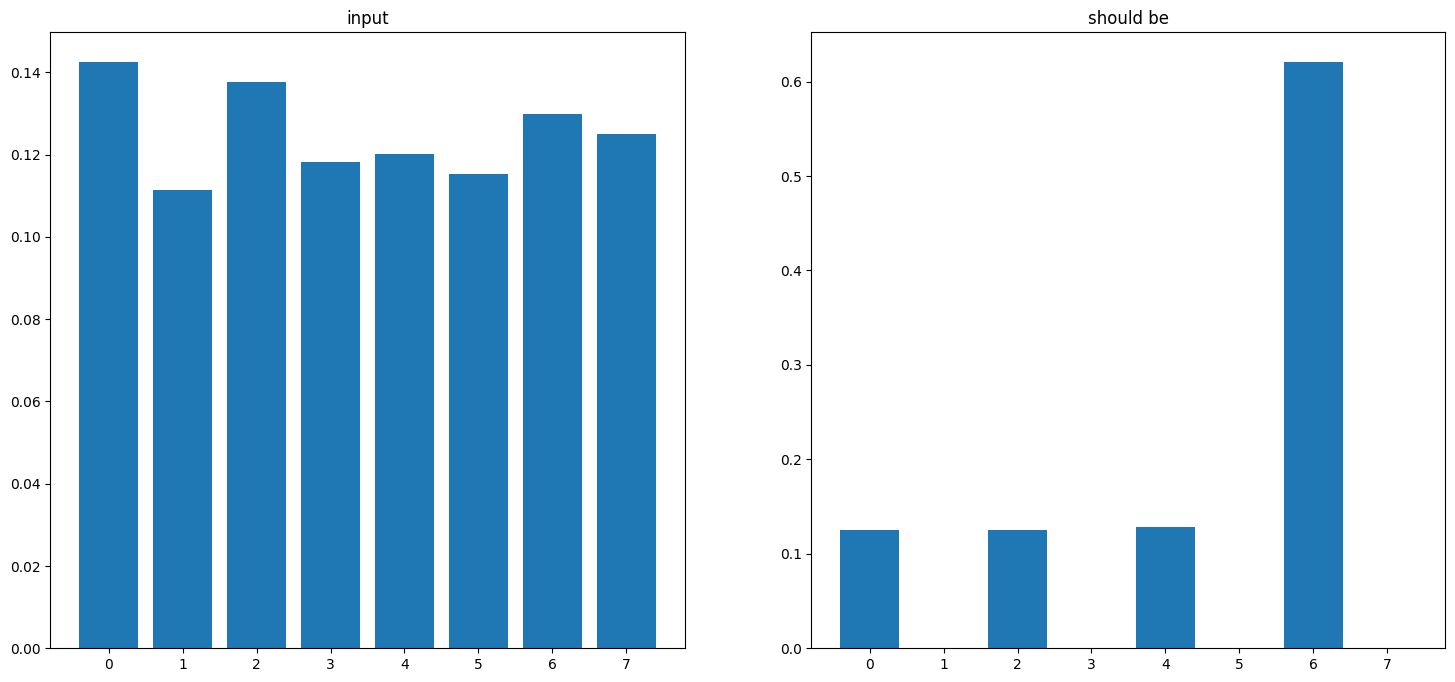

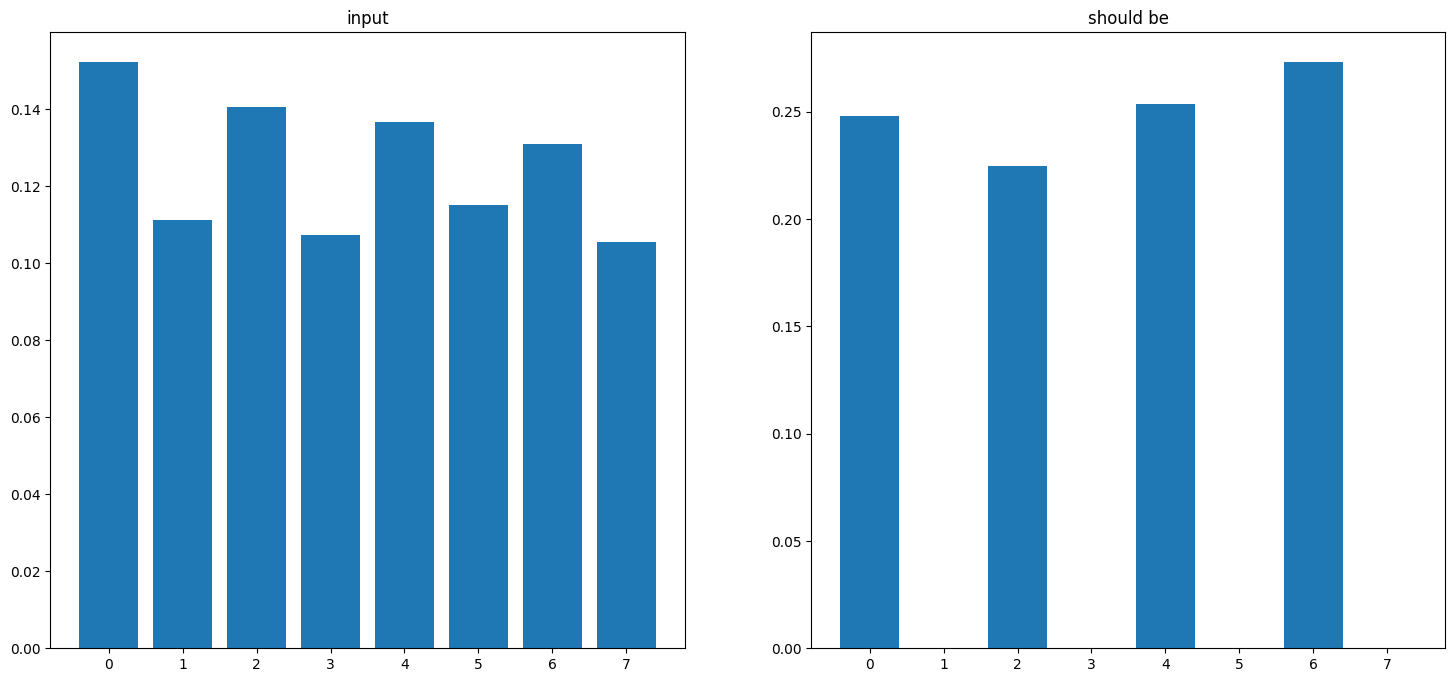

In [32]:
for i in range(12):
    xs = np.arange(len(X[i]))

    fig, ax = plt.subplots(ncols=2, figsize=(18,8))
    ax[0].bar(xs, X[i])
    ax[0].set_title("input")
    ax[1].bar(xs, y[i])
    ax[1].set_title("should be")
    plt.show()